In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [5]:
def party_members(my_dict):
    return [len(value) for value in my_dict]

In [2]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df_mono = df.loc[(df.cmdCode == 1) & (df.yr == 2015)].reset_index()

G = nx.from_pandas_edgelist(df_mono,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

## Rich Club:
***
Considering the contry that holds 50% of the export

In [3]:
p = 0.5
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
rich_club = {comm : [] for comm in commodities}
for cc, comm in enumerate(commodities):
    for yy, year in enumerate(years):
        df_tmp     = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
        df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
        rich_mask  = [True, *list(df_export.TradeValue.cumsum() < tot_export*p)[:-1]]
        #rich_club[comm].append(df_export.pt3ISO[rich_mask].values)
        rich_club[comm].append(np.sort(df_export.pt3ISO[rich_mask].values))


In [207]:
p = [0.5, 0.45, 0.4, 0.35]
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
rich_rich_club = dict()
for pp in p:
    rich_rich_club[pp] = []
    for yy, year in enumerate(years):
        df_tmp     = df.loc[(df.yr == year)].reset_index()
        tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
        df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
        rich_mask  = [True, *list(df_export.TradeValue.cumsum() < tot_export*pp)[:-1]]
        #rich_club[comm].append(df_export.pt3ISO[rich_mask].values)
        rich_rich_club[pp].append(np.sort(df_export.pt3ISO[rich_mask].values))


In [159]:
df_export.TradeValue.cumsum() < tot_export*pp

0       True
1       True
2      False
3      False
4      False
       ...  
228    False
229    False
230    False
231    False
232    False
Name: TradeValue, Length: 233, dtype: bool

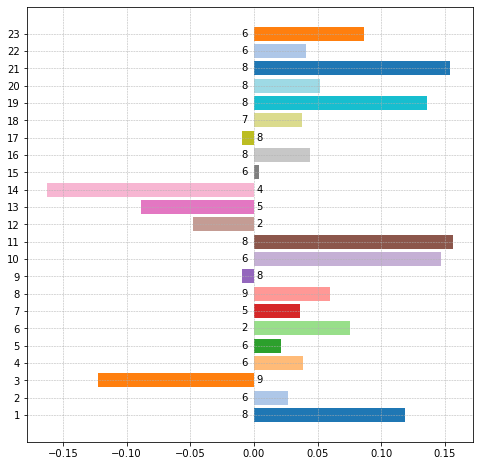

In [24]:
fig, ax = plt.subplots(1,1, figsize=[8,8])
cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list
slopes = np.zeros(len(commodities))
for cc,comm in enumerate(commodities):
    y = party_members(rich_club[comm])
    slopes[cc], a = np.polyfit(years, y, 1)
    #if (slopes[cc]<0):
    #    ax[0].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
    #    ax[0].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
    #else:
    #    ax[2].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
    #    ax[2].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
    if (slopes[cc] > 0):
        ax.text(-0.010,comm-0.15, y[-1])
    else:
        ax.text(0.002,comm-0.15, y[-1])
ax.barh(commodities, slopes, color=colorss)
ax.set_yticks(commodities)
ax.grid(linestyle='--', zorder=-10, linewidth=0.5)

plt.show()

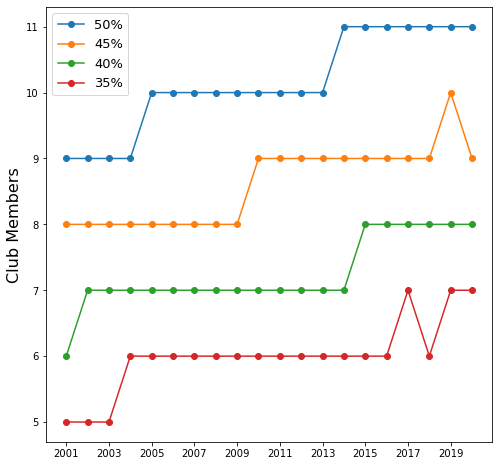

In [209]:
plt.figure(figsize=[8,8])
for pp in p:
    plt.plot(years, party_members(rich_rich_club[pp]), '-o', label=str(int(pp*100))+'%')
plt.ylabel('Club Members', fontsize=16)
#plt.xlabel('year', fontsize=16)
plt.xticks(np.array(years[0:-1:2]).astype(int))
plt.legend(fontsize=13)
plt.show()

Text(0.5, 0, 'year')

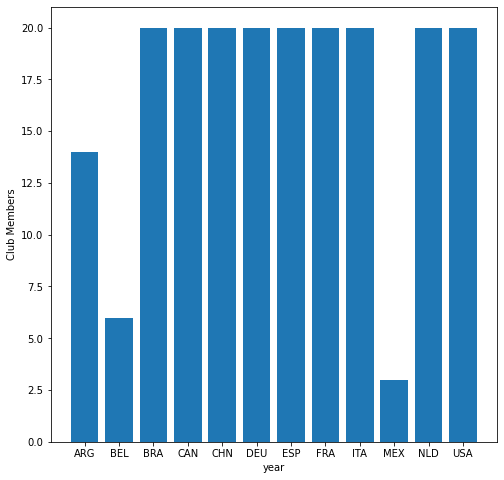

In [149]:
plt.figure(figsize=[8,8])
flat_list = []
for line in rich_rich_club[0.5]:
    flat_list.extend(list(line))
x, h = np.unique(flat_list, return_counts=True)
plt.bar(x,h)
plt.ylabel('Club Members')
plt.xlabel('year')

## Rich Club:
***
Considering how change the export for the top X country 

In [64]:
p = 0.5
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
rich_club_2 = {comm : [] for comm in commodities}
for cc, comm in enumerate(commodities):
    for yy, year in enumerate(years):
        df_tmp     = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
        df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
        #rich_mask  = [True, *list(df_export.TradeValue.cumsum() < tot_export*p)[:-1]]
        #rich_club[comm].append(df_export.pt3ISO[rich_mask].values)
        rich_club_2[comm].append(df_export.TradeValue[:5].values.sum()/tot_export)


In [199]:
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
rich_rich_club_2 = []
tot_export = []
for yy, year in enumerate(years):
    df_tmp     = df.loc[(df.yr == year)].reset_index()
    tot_export.append(df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum())
    df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
    #rich_mask  = [True, *list(df_export.TradeValue.cumsum() < tot_export*pp)[:-1]]
    #rich_club[comm].append(df_export.pt3ISO[rich_mask].values)
    rich_rich_club_2.append(df_export.loc[:4,['pt3ISO', 'TradeValue']].values)
    #append(np.sort(df_export.pt3ISO[rich_mask].values))


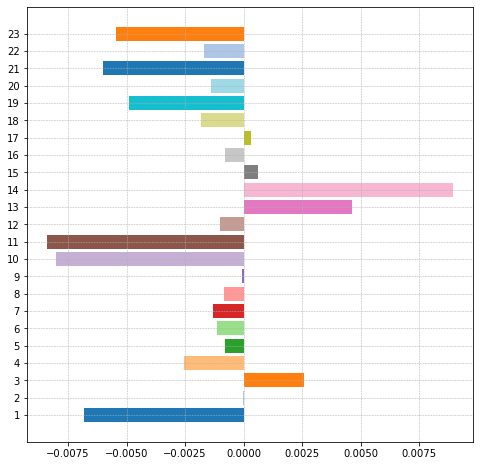

In [67]:
fig, ax = plt.subplots(1,1, figsize=[8,8])
cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list
slopes = np.zeros(len(commodities))
for cc,comm in enumerate(commodities):
    y = rich_club_2[comm]
    slopes[cc], a = np.polyfit(years, y, 1)
    #if (slopes[cc]<0):
    #    ax[0].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
    #    ax[0].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
    #else:
    #    ax[2].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
    #    ax[2].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
    #if (slopes[cc] > 0):
    #    ax.text(-0.010,comm-0.15, y[-1])
    #else:
    #    ax.text(0.002,comm-0.15, y[-1])
ax.barh(commodities, slopes, color=colorss)
ax.set_yticks(commodities)
ax.grid(linestyle='--', zorder=-10, linewidth=0.5)

plt.show()

In [200]:
members = np.unique(np.array(rich_rich_club_2)[:,:,0])
rich_dict = {member : np.zeros(len(years)) for member in members}
for yy,year in enumerate(years):
    for mm,member in enumerate(np.array(rich_rich_club_2)[yy,:,0]):
        rich_dict[member][yy] = np.array(rich_rich_club_2)[yy,mm,1]

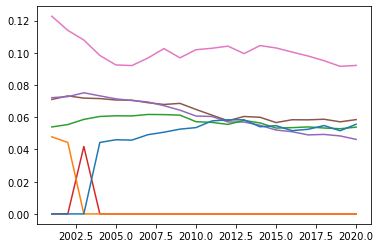

In [154]:

for mm,member in enumerate(members):
    plt.plot(years, rich_dict[member]/tot_export, zorder = -mm, )
#plt.plot(years, np.array(tot_export)/2)

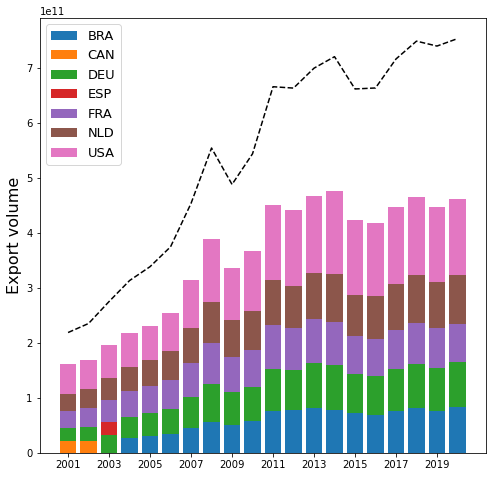

In [206]:
plt.figure(figsize=[8,8])
last = 0
p = [0.5, 0.4, 0.3, 0.2]
for mm,member in enumerate(members):
    plt.bar(years, rich_dict[member], zorder = -mm, bottom=last, label=member)
    last += rich_dict[member]
plt.legend(fontsize=13)
plt.plot(years, np.array(tot_export)*0.5, color='black', linestyle='--')
plt.xticks(np.array(years[0:-1:2]).astype(int))
plt.ylabel('Export volume', fontsize=16)
plt.show()

In [163]:
members

array(['BRA', 'CAN', 'DEU', 'ESP', 'FRA', 'NLD', 'USA'], dtype=object)

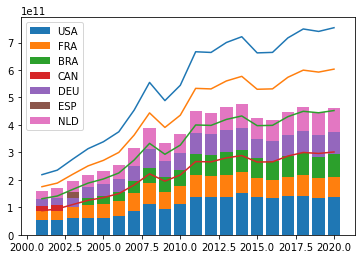

In [164]:
last = 0
p = [0.5, 0.4, 0.3, 0.2]
for mm,member in enumerate(['USA', 'FRA', 'BRA', 'CAN', 'DEU', 'ESP', 'NLD']):
    plt.bar(years, rich_dict[member], zorder = -mm, bottom=last, label=member)
    last += rich_dict[member]
plt.legend()
for pp in p:
    plt.plot(years, np.array(tot_export)*pp)

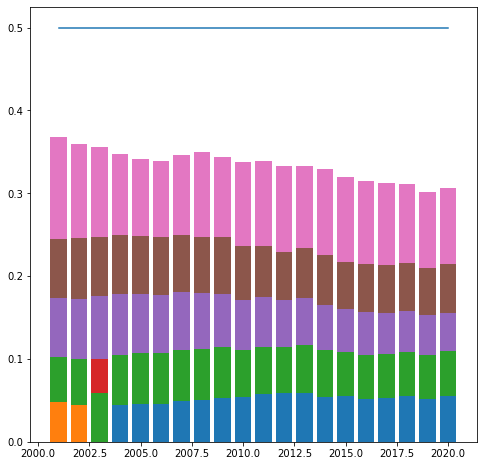

In [144]:
plt.figure(figsize=[8,8])
last = 0
for mm,member in enumerate(members):
    plt.bar(years, rich_dict[member]/tot_export, zorder = 100-mm, bottom=last)
    last += rich_dict[member]/tot_export
plt.plot(years, [0.5]*len(years))

In [150]:
rich_rich_club

{0.5: [array(['BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD', 'USA'],
        dtype=object),
  array(['BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD', 'USA'],
        dtype=object),
  array(['BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD', 'USA'],
        dtype=object),
  array(['BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD', 'USA'],
        dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dtype=object),
  array(['ARG', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'NLD',
         'USA'], dt

In [17]:
p = 0.5
rich_rich_club = []
rich_rich_countries = []
for year in years:
    df_tmp     = df.loc[df.yr == year].reset_index()
    tot_export = df_tmp.groupby('pt3ISO')['TradeValue'].sum().values.sum()
    df_export  = df_tmp.groupby('pt3ISO').sum().reset_index().loc[:,['pt3ISO', 'TradeValue']].sort_values(by=['TradeValue'], axis=0, ascending=False).reset_index()
    rich_mask  = [True, *list(df_export.TradeValue.cumsum() < tot_export*p)[:-1]]
    #rich_rich_club.append(np.sort(df_export.pt3ISO[rich_mask].values))
    df_final = df_export.loc[rich_mask, ['pt3ISO', 'TradeValue']].reset_index()
    df_final.iloc[-1,2] = tot_export*p - df_final.TradeValue.cumsum().values[-2]
    print(tot_export*p - df_final.TradeValue.cumsum().values[-2])
    rich_rich_club.append(df_final.sort_values(by=['pt3ISO'], axis=0).reset_index().loc[:,['pt3ISO', 'TradeValue']])
    rich_rich_countries.extend(df_final.pt3ISO.values)
rich_rich_countries = np.unique(rich_rich_countries)

8142745704.5
11061417065.5
14384428009.0
20834352162.5
2299194947.0
4187195744.5
3406568741.5
1170568470.5
11132857473.5
21552100334.0
29336932847.5
32642856470.5
37998612404.5
5019853712.0
13203124223.0


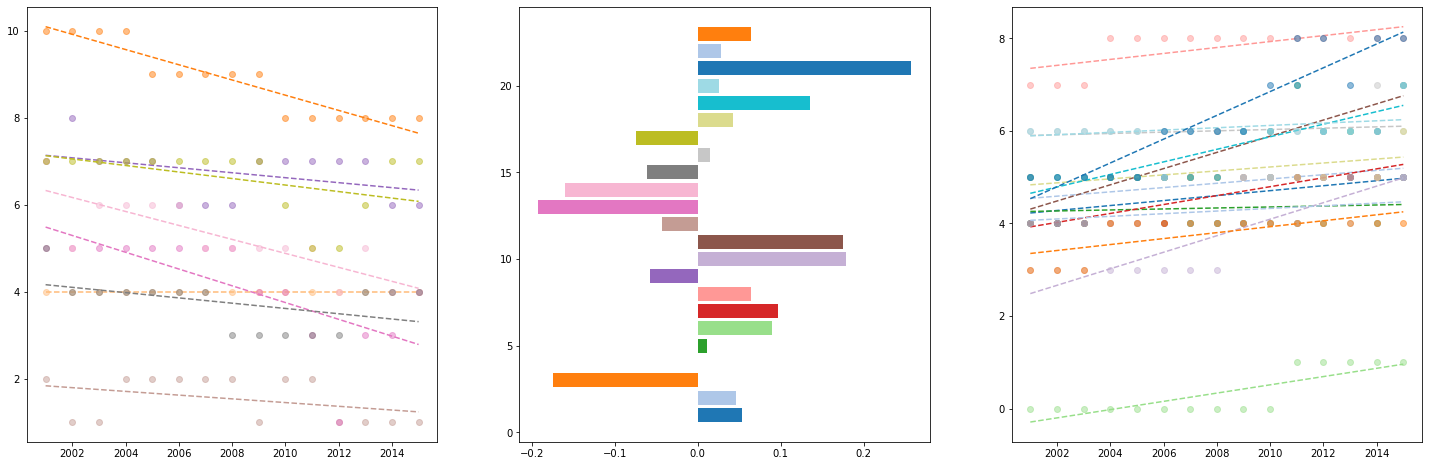

In [19]:
fig, ax = plt.subplots(1,3, figsize=[25,8])
cmap = get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
colorss = cmap.colors  # type: list
slopes = np.zeros(len(commodities))
for cc,comm in enumerate(commodities):
    y = party_members(rich_club[comm])
    slopes[cc], a = np.polyfit(years, y, 1)
    if (slopes[cc]<0):
        ax[0].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
        ax[0].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
    else:
        ax[2].plot(years, y, 'o', color=colorss[cc%20], alpha=0.5)
        ax[2].plot(years, a + slopes[cc]*years, '--', color=colorss[cc%20])
ax[1].barh(commodities, slopes, color=colorss)
plt.show()

In [48]:
flat_list = []
for line in rich_rich_club:
    flat_list.extend(list(line))

In [53]:
rich_rich_club

{0.5: array(['BEL', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'ITA', 'MEX',
        'NLD', 'USA'], dtype=object),
 0.4: array(['BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'NLD', 'USA'],
       dtype=object),
 0.3: array(['BRA', 'DEU', 'FRA', 'NLD', 'USA'], dtype=object)}

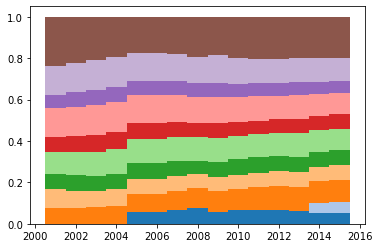

In [13]:
h = np.zeros(len(years))
for cc,country in enumerate(rich_rich_countries):
    for yy,year in enumerate(years):
        norm = rich_rich_club[yy].TradeValue.sum()
        height = rich_rich_club[yy].loc[rich_rich_club[yy].pt3ISO == country, 'TradeValue'].values 
        if len(height)>0:
            h[yy] += height / norm
    plt.bar(years, h, color=colorss[cc], width=1,  zorder= len(rich_rich_countries)-cc)
    #plt.show()

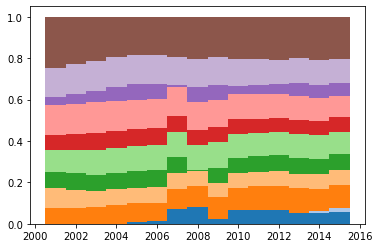

In [11]:
h = np.zeros(len(years))
for cc,country in enumerate(rich_rich_countries):
    for yy,year in enumerate(years):
        norm = rich_rich_club[yy].TradeValue.sum()
        height = rich_rich_club[yy].loc[rich_rich_club[yy].pt3ISO == country, 'TradeValue'].values 
        if len(height)>0:
            h[yy] += height / norm
    plt.bar(years, h, color=colorss[cc], width=1,  zorder= len(rich_rich_countries)-cc)
    #plt.show()

In [ ]:
## Diersifica<ione di mercato